# House Price
# Анализ, предобработка данных и построение модели 

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor,
    VotingRegressor,
)
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

from sklearn.svm import SVR

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import chi2, VarianceThreshold
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    accuracy_score,
)


## Первичный анализ

In [253]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

df = [df_train, df_test]

In [254]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [255]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [256]:
#Посмотрим на пропуски в данных
null_columns = []

for col in df_train.columns:
    if df_train[col].isna().sum() > 0:
        null_columns.append([df_train[col].isna().sum() * 100 / len(df_train), col])

null_columns.sort()
null_columns.reverse()
null_columns

[[99.52054794520548, 'PoolQC'],
 [96.3013698630137, 'MiscFeature'],
 [93.76712328767124, 'Alley'],
 [80.75342465753425, 'Fence'],
 [47.26027397260274, 'FireplaceQu'],
 [17.73972602739726, 'LotFrontage'],
 [5.5479452054794525, 'GarageYrBlt'],
 [5.5479452054794525, 'GarageType'],
 [5.5479452054794525, 'GarageQual'],
 [5.5479452054794525, 'GarageFinish'],
 [5.5479452054794525, 'GarageCond'],
 [2.6027397260273974, 'BsmtFinType2'],
 [2.6027397260273974, 'BsmtExposure'],
 [2.5342465753424657, 'BsmtQual'],
 [2.5342465753424657, 'BsmtFinType1'],
 [2.5342465753424657, 'BsmtCond'],
 [0.547945205479452, 'MasVnrType'],
 [0.547945205479452, 'MasVnrArea'],
 [0.0684931506849315, 'Electrical']]

## Визуализация данных

In [257]:
#Опишем необходимые функции для визуализации

def distribution(col, with_log):
    for j, i in enumerate(col):
        dataset = df_train.copy()
        if with_log:
            dataset[col] = np.log(dataset[col])
        sns.histplot(data=dataset, x=i, kde=True)
        plt.show()
    return

def Scatter(col, with_log):
    dataset = df_train.copy()
    for j, i in enumerate(col):
        if with_log:
            dataset[col] = np.log(dataset[col])

        plt.figure(figsize=(4, 3))
        sns.regplot(
            data=dataset,
            x=i,
            y="SalePrice",
        )
        plt.show()
    return

def Heat_map(col):
    dataset = df_train[col].copy()
    corr = dataset.corr()
    plt.figure(figsize=(25, 13))
    sns.heatmap(corr, annot=True)
    
def years_lineplot(year_columns):
    plt.figure(figsize=(20, 20))
    dataset = df_train.copy()
    for i, col in enumerate(year_columns):
        plt.subplot(6, 4, i + 1)
        dataset.groupby(col)["SalePrice"].median().plot()
        plt.xlabel(col)
        plt.ylabel("Median House Price")
        plt.title("House Price vs YearSold")

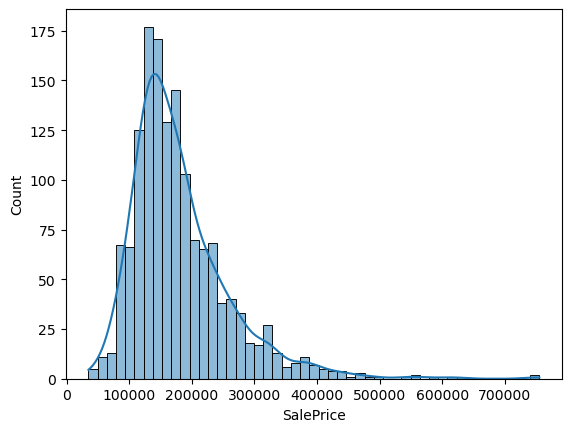

skew 1.8828757597682129
kurt 6.536281860064529


In [258]:
#Посмотрим на распределение целевой переменной
distribution(["SalePrice"], 0)

print("skew", df_train["SalePrice"].skew())
print("kurt", df_train["SalePrice"].kurt())

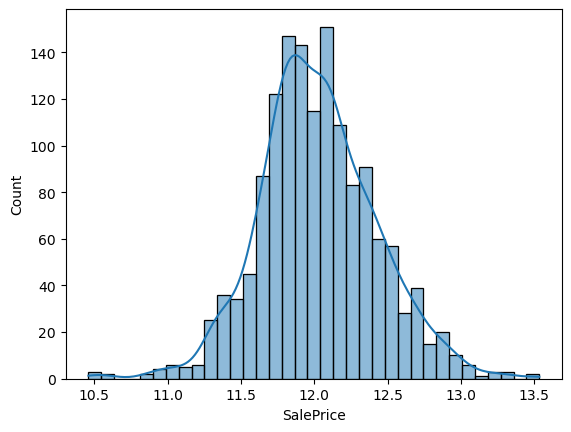

In [259]:
distribution(["SalePrice"], 1)

In [260]:
#Отберем числовые признаки
numerical_columns = []
for col in df_train.columns:
    if df_train[col].dtype != "O" and col != "Id" and col != "SalePrice":
        numerical_columns.append(col)

numerical_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

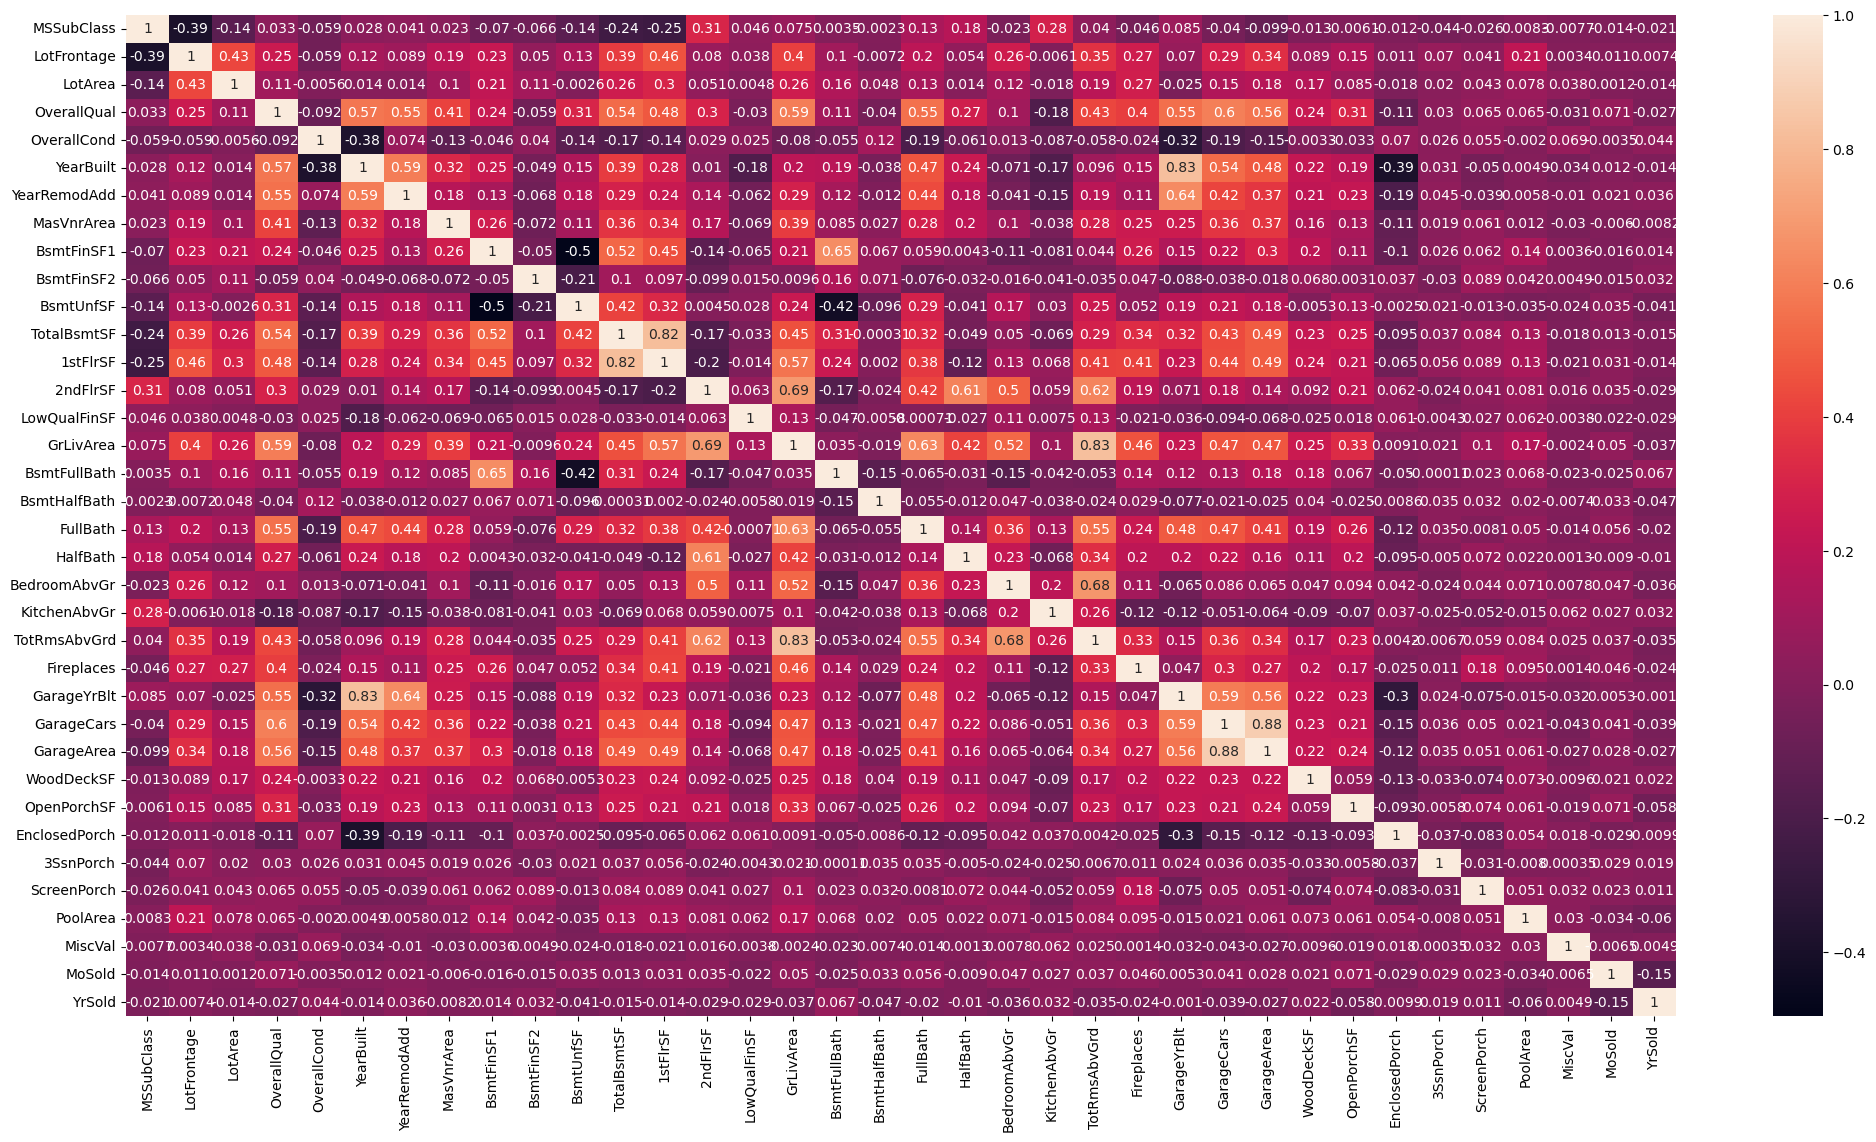

In [261]:
#Посмотрим на корреляцию числовых признаков
Heat_map(numerical_columns)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'PoolArea']


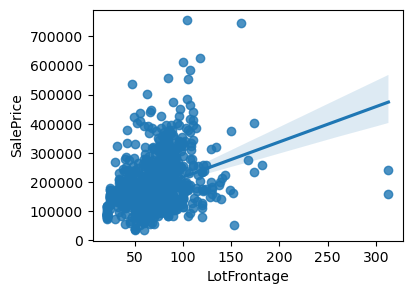

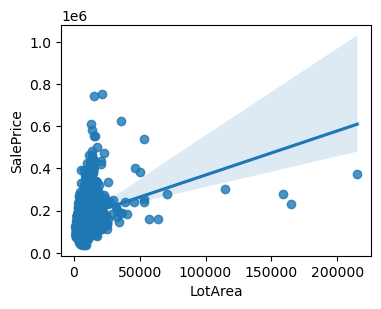

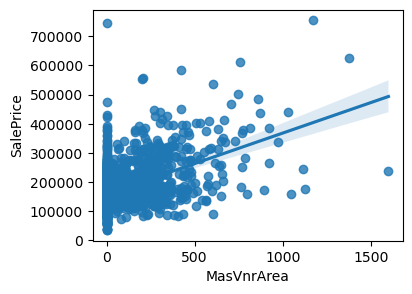

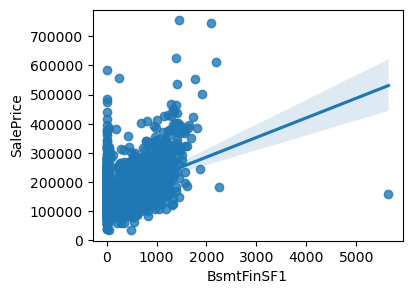

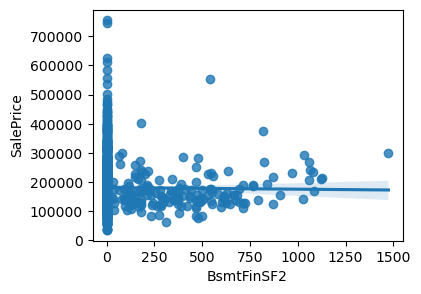

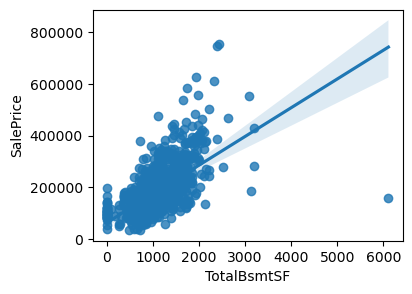

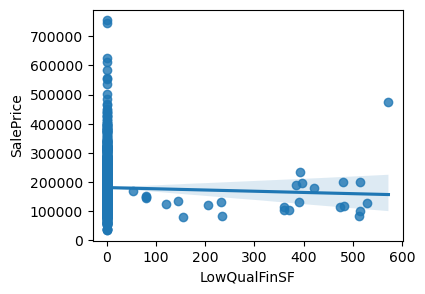

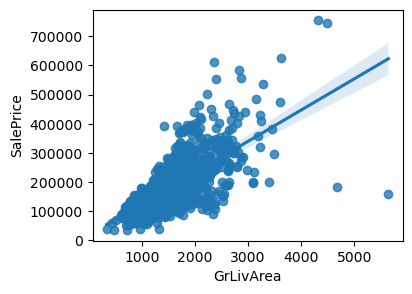

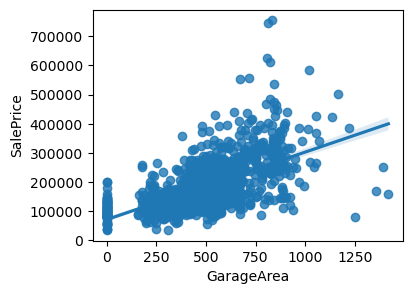

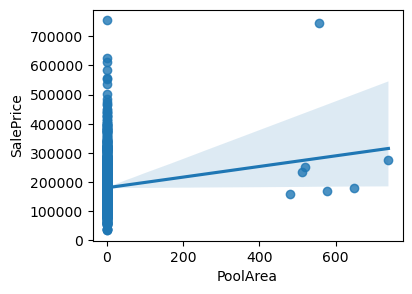

In [262]:
#Посмотрим на связь между признаками,отображающими площадь, и целевой переменной
areas = []
for i in numerical_columns:
    if (
        i.find("Area") != -1
        or i.find("Lot") != -1
        or i.find("FinSF") != -1
        or i.find("TotalBsmtSF") != -1
    ):
        areas.append(i)
print(areas)
Scatter(areas, 0)

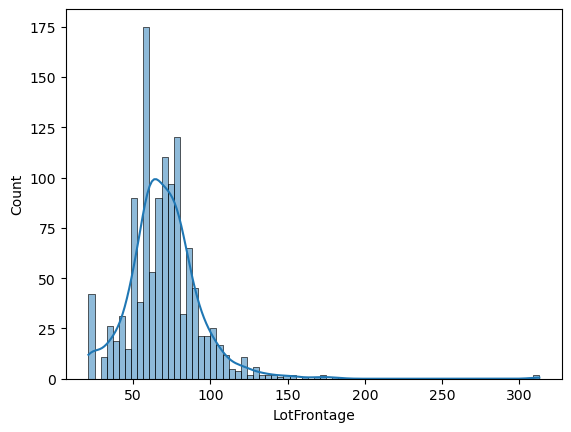

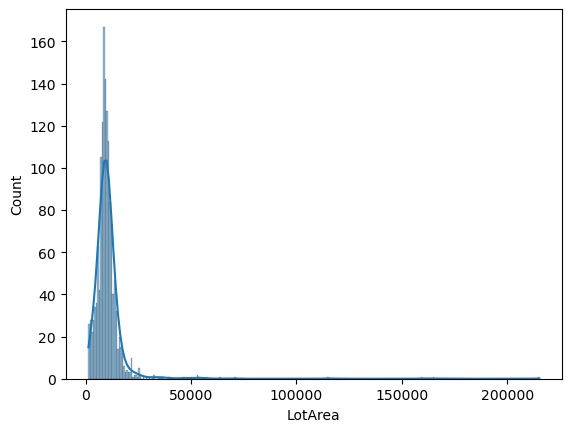

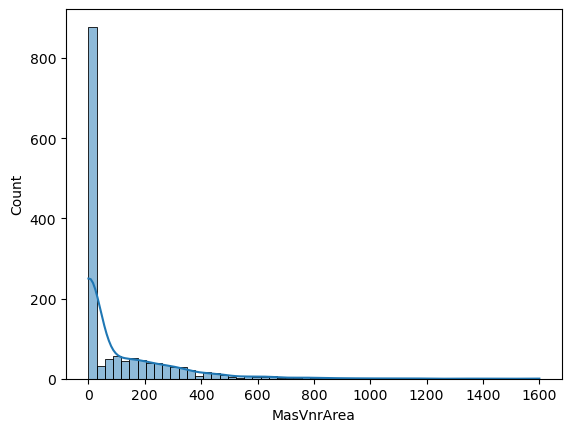

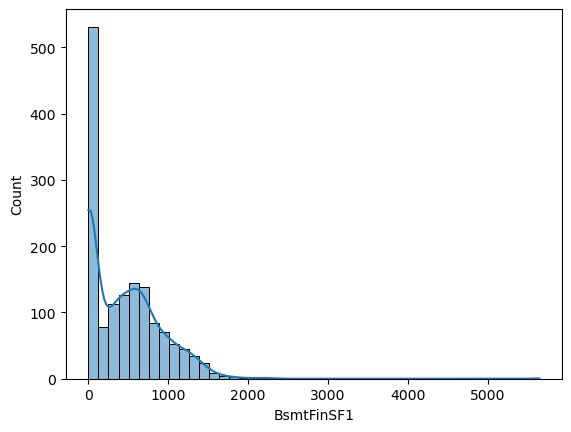

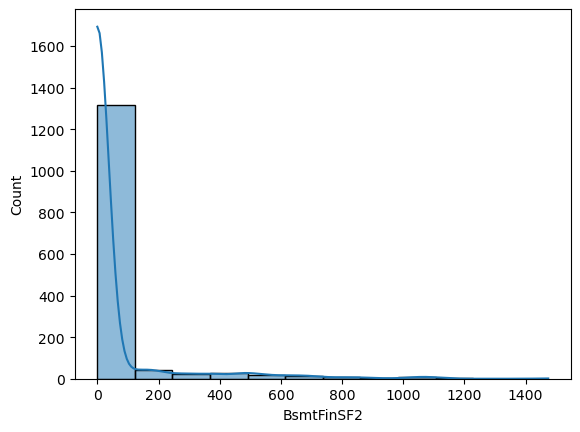

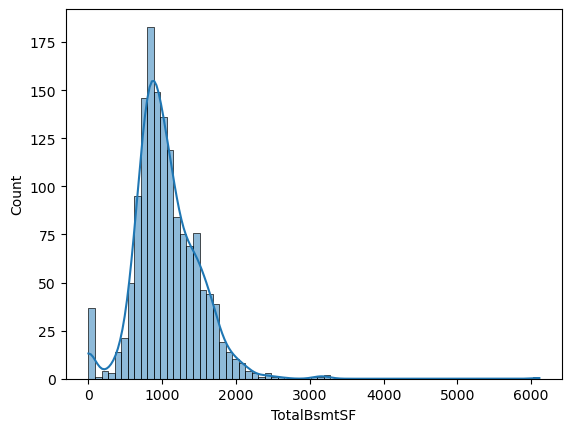

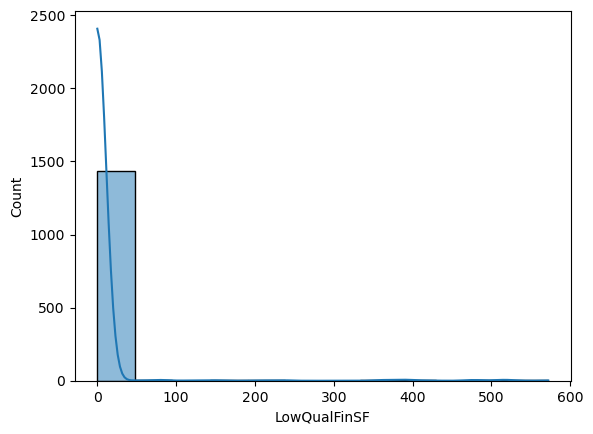

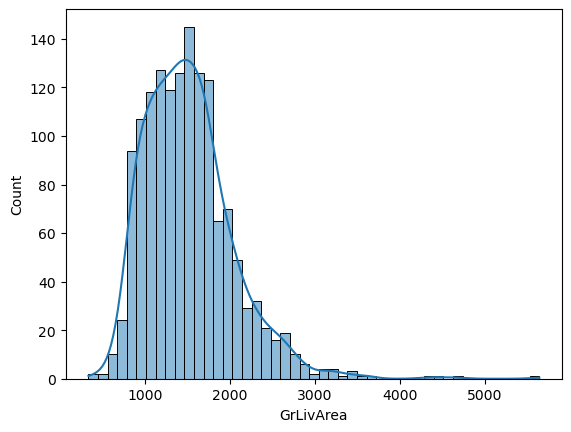

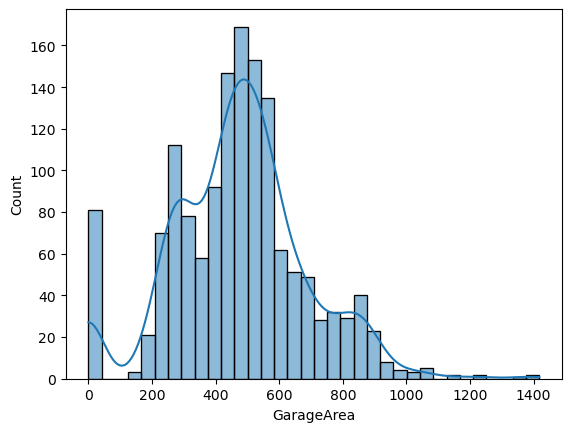

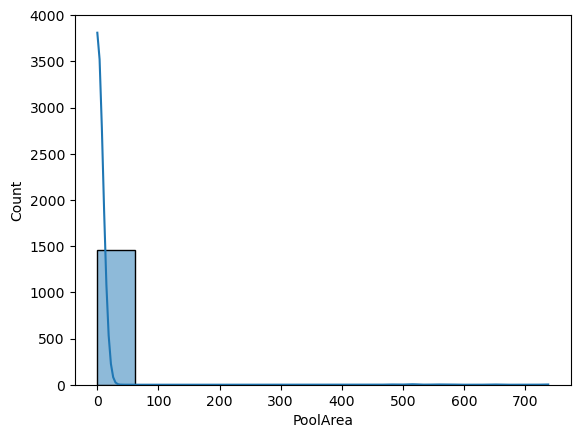

In [263]:
distribution(areas, 0)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


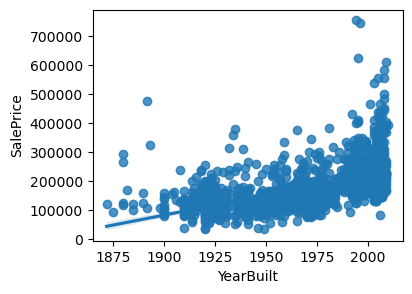

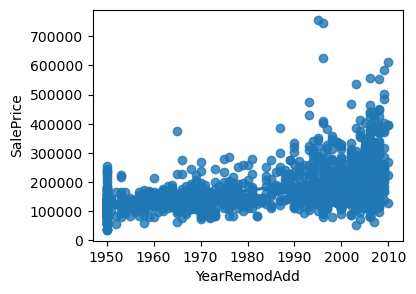

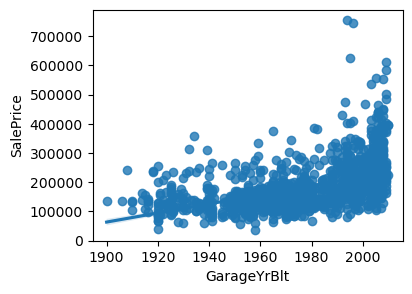

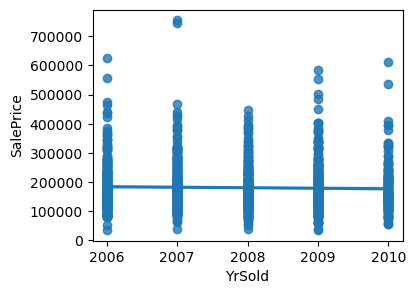

In [264]:
#Посмотрим на связь между признаками,отображающими Год, и целевой переменной
Years = []
for i in numerical_columns:
    if i.find("Year") != -1 or i.find("Yr") != -1:
        Years.append(i)
print(Years)
Scatter(Years, 0)

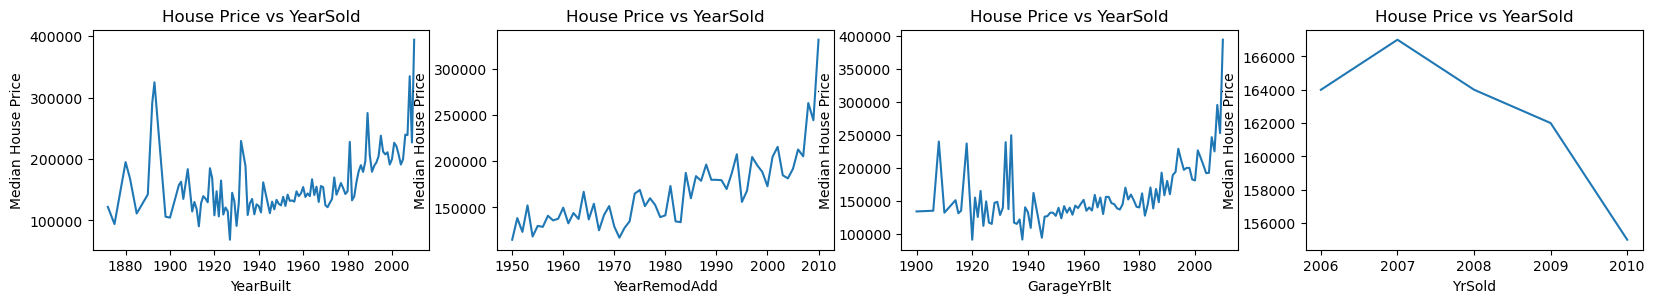

In [265]:
years_lineplot(Years)

['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']


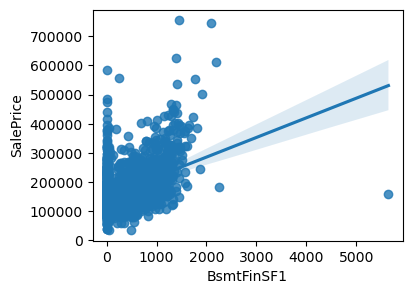

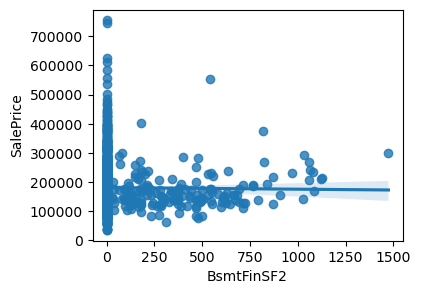

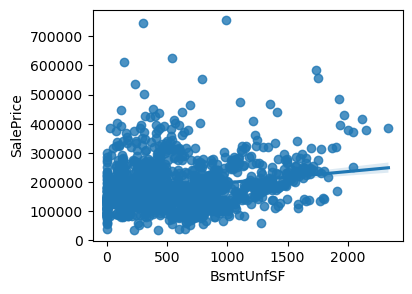

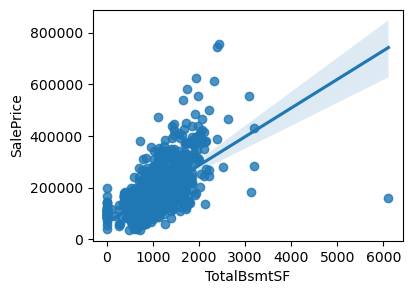

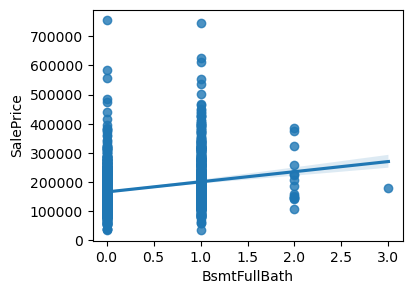

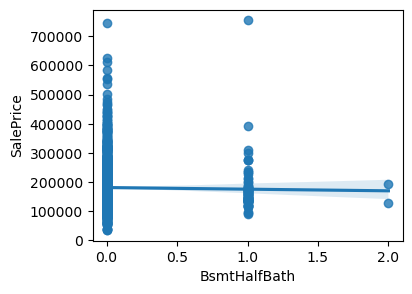

In [266]:
#Посмотрим также на признаки, где есть Bsmt подвал
Bsmt = []
for i in numerical_columns:
    if i.find("Bsmt") != -1:
        Bsmt.append(i)
print(Bsmt)
Scatter(Bsmt, 0)

In [267]:
#Признаки FullBath, HalfBath и BsmtFinSF2 никак не влияют
#У других признаков есть небольшая корреляция

['BedroomAbvGr', 'KitchenAbvGr']


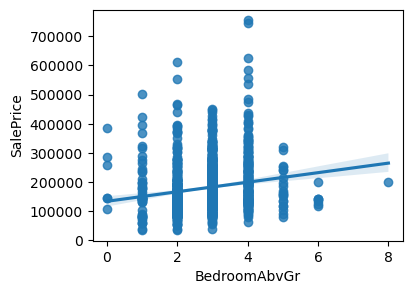

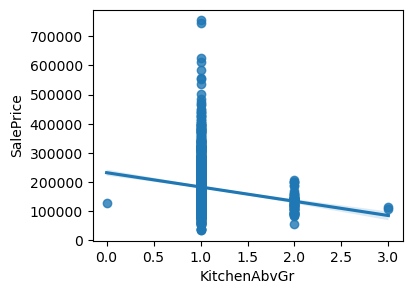

In [268]:
KitchenBed = []
for i in numerical_columns:
    if i.find("Bed") != -1 or i.find("Kitchen") != -1:
        KitchenBed.append(i)
print(KitchenBed)
Scatter(KitchenBed, 0)

## Предобработка данных 



In [269]:
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

Уберем признаки, в которых больше 30% пропусков

In [270]:
uneeded_columns = []

for column in df_train.columns:
    percentage = df_train[column].isna().sum() * 100 / len(df_train)
    if percentage > 30:
        uneeded_columns.append([column, percentage])

uneeded_columns

[['Alley', 93.76712328767124],
 ['FireplaceQu', 47.26027397260274],
 ['PoolQC', 99.52054794520548],
 ['Fence', 80.75342465753425],
 ['MiscFeature', 96.3013698630137]]

In [271]:
drop = []
for i, j in uneeded_columns:
    drop.append(i)

for dataset in df:
    dataset.drop(columns=drop, axis=1, inplace=True)

In [272]:
df_train.shape, df_test.shape

((1460, 76), (1459, 75))

Заполним пропуски средним значением, если у признака пропусков меньше 3%, в другом случае используем линейную модель или дерево решений, чтобы заполнить пропуски 

In [273]:
null_num_columns = []
null_cat_columns = []

for column in df_train.columns:
    percentage = df_train[column].isna().sum() * 100 / len(df_train)
    if percentage > 0:
        if df_train[column].dtype != "O":
            null_num_columns.append([column, percentage])
        else:
            null_cat_columns.append([column, percentage])

print(null_num_columns, "\n")
print(null_cat_columns)

[['LotFrontage', 17.73972602739726], ['MasVnrArea', 0.547945205479452], ['GarageYrBlt', 5.5479452054794525]] 

[['MasVnrType', 0.547945205479452], ['BsmtQual', 2.5342465753424657], ['BsmtCond', 2.5342465753424657], ['BsmtExposure', 2.6027397260273974], ['BsmtFinType1', 2.5342465753424657], ['BsmtFinType2', 2.6027397260273974], ['Electrical', 0.0684931506849315], ['GarageType', 5.5479452054794525], ['GarageFinish', 5.5479452054794525], ['GarageQual', 5.5479452054794525], ['GarageCond', 5.5479452054794525]]


In [274]:
num_columns = []
cat_columns = []
for i, j in null_num_columns:
    num_columns.append(i)

for i, j in null_cat_columns:
    cat_columns.append(i)


print(num_columns)
print()
print(cat_columns)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [275]:
def fill_numerical_values_with_linear_model(dataset, column):

    data = dataset[[column, "SalePrice"]].copy()
    data[column] = data[column].fillna(-1)
    train = data[data[column] != -1]
    missied_data = pd.DataFrame(data[data[column] == -1]["SalePrice"])

    x_train, x_test, y_train, y_test = train_test_split(
        train.drop(columns=column, axis=1),
        train[column],
        train_size=0.01,
        random_state=42,
    )

    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)
    predction = list(lin_reg.predict(missied_data))

    def update(value):
        if value == -1:
            ret = int(predction[0])
            predction.pop(0)
            return ret
        return value

    dataset[column] = dataset[column].fillna(-1)
    dataset[column] = dataset[column].apply(update)

    return dataset[column]

def fill_numerical_values_with_mean(dataset=pd.DataFrame(), column=str):

    mean = dataset[column].mean()
    dataset[column] = dataset[column].fillna(mean)
    return dataset[column]


for column in num_columns:
    percentage = df_train[column].isna().sum() * 100 / len(df_train)

    if percentage <= 3:  # Заполняем средним
        df_train[column] = fill_numerical_values_with_mean(df_train, column)

    else:  # Заполняем с помощью модели
        df_train[column] = fill_numerical_values_with_linear_model(df_train, column)

Для категориальных признаков используем моду или Случайный лес

In [276]:
def fill_numerical_values_with_RF_model(dataset, column):
    data = dataset[[column, "SalePrice"]].copy()
    data[column] = data[column].fillna("missied_data")
    train = data[data[column] != "missied_data"]
    missied_data = pd.DataFrame(data[data[column] == "missied_data"]["SalePrice"])

    x_train, x_test, y_train, y_test = train_test_split(
        train.drop(columns=column, axis=1),
        train[column],
        train_size=0.01,
        random_state=42,
    )

    RF = RandomForestClassifier(ccp_alpha=0.015)
    RF.fit(x_train, y_train)
    predction = list(RF.predict(missied_data))

    def update(value):
        if value == "missied_data":
            ret = predction[0]
            predction.pop(0)
            return ret
        return value

    dataset[column] = dataset[column].fillna("missied_data")
    dataset[column] = dataset[column].apply(update)

    return dataset[column]


def fill_numerical_values_with_mode(dataset, column):
    mode = dataset[column].mode()[0]
    dataset[column] = dataset[column].fillna(mode)
    return dataset[column]


for column in cat_columns:
    percentage = df_train[column].isna().sum() * 100 / len(df_train)

    if percentage <= 3:  # with mean
        df_train[column] = fill_numerical_values_with_mode(df_train, column)

    else:  # with model
        df_train[column] = fill_numerical_values_with_RF_model(df_train, column)


In [277]:
#Заполним пропуски в тестовом датасете
null_num_columns = []
null_cat_columns = []

for column in df_test.columns:
    percentage = df_test[column].isna().sum() * 100 / len(df_test)
    if percentage > 0:
        if df_test[column].dtype != "O":
            null_num_columns.append([column, percentage])
        else:
            null_cat_columns.append([column, percentage])

print(null_num_columns, "\n")
print(null_cat_columns)

[['LotFrontage', 15.558601782042494], ['MasVnrArea', 1.0281014393420151], ['BsmtFinSF1', 0.06854009595613433], ['BsmtFinSF2', 0.06854009595613433], ['BsmtUnfSF', 0.06854009595613433], ['TotalBsmtSF', 0.06854009595613433], ['BsmtFullBath', 0.13708019191226867], ['BsmtHalfBath', 0.13708019191226867], ['GarageYrBlt', 5.346127484578479], ['GarageCars', 0.06854009595613433], ['GarageArea', 0.06854009595613433]] 

[['MSZoning', 0.27416038382453733], ['Utilities', 0.13708019191226867], ['Exterior1st', 0.06854009595613433], ['Exterior2nd', 0.06854009595613433], ['MasVnrType', 1.0966415352981493], ['BsmtQual', 3.015764222069911], ['BsmtCond', 3.0843043180260454], ['BsmtExposure', 3.015764222069911], ['BsmtFinType1', 2.8786840301576424], ['BsmtFinType2', 2.8786840301576424], ['KitchenQual', 0.06854009595613433], ['Functional', 0.13708019191226867], ['GarageType', 5.2090472926662095], ['GarageFinish', 5.346127484578479], ['GarageQual', 5.346127484578479], ['GarageCond', 5.346127484578479], ['Sale

In [278]:
#У признаков не так много пропусков, поэтому я заполню все с помощью среднего значения и моды
for column in cat_columns:
    df_test[column] = fill_numerical_values_with_mode(df_test, column)

for column in num_columns:
    df_test[column] = fill_numerical_values_with_mean(df_test, column)

In [279]:
df_train.shape, df_test.shape

((1460, 76), (1459, 75))

Посмотрим на выбросы

In [280]:
numirical_columns = []

for col in df_train.columns:
    if df_train[col].dtype != "O":
        numirical_columns.append(col)
numirical_columns.remove("SalePrice")
len(numirical_columns)

37

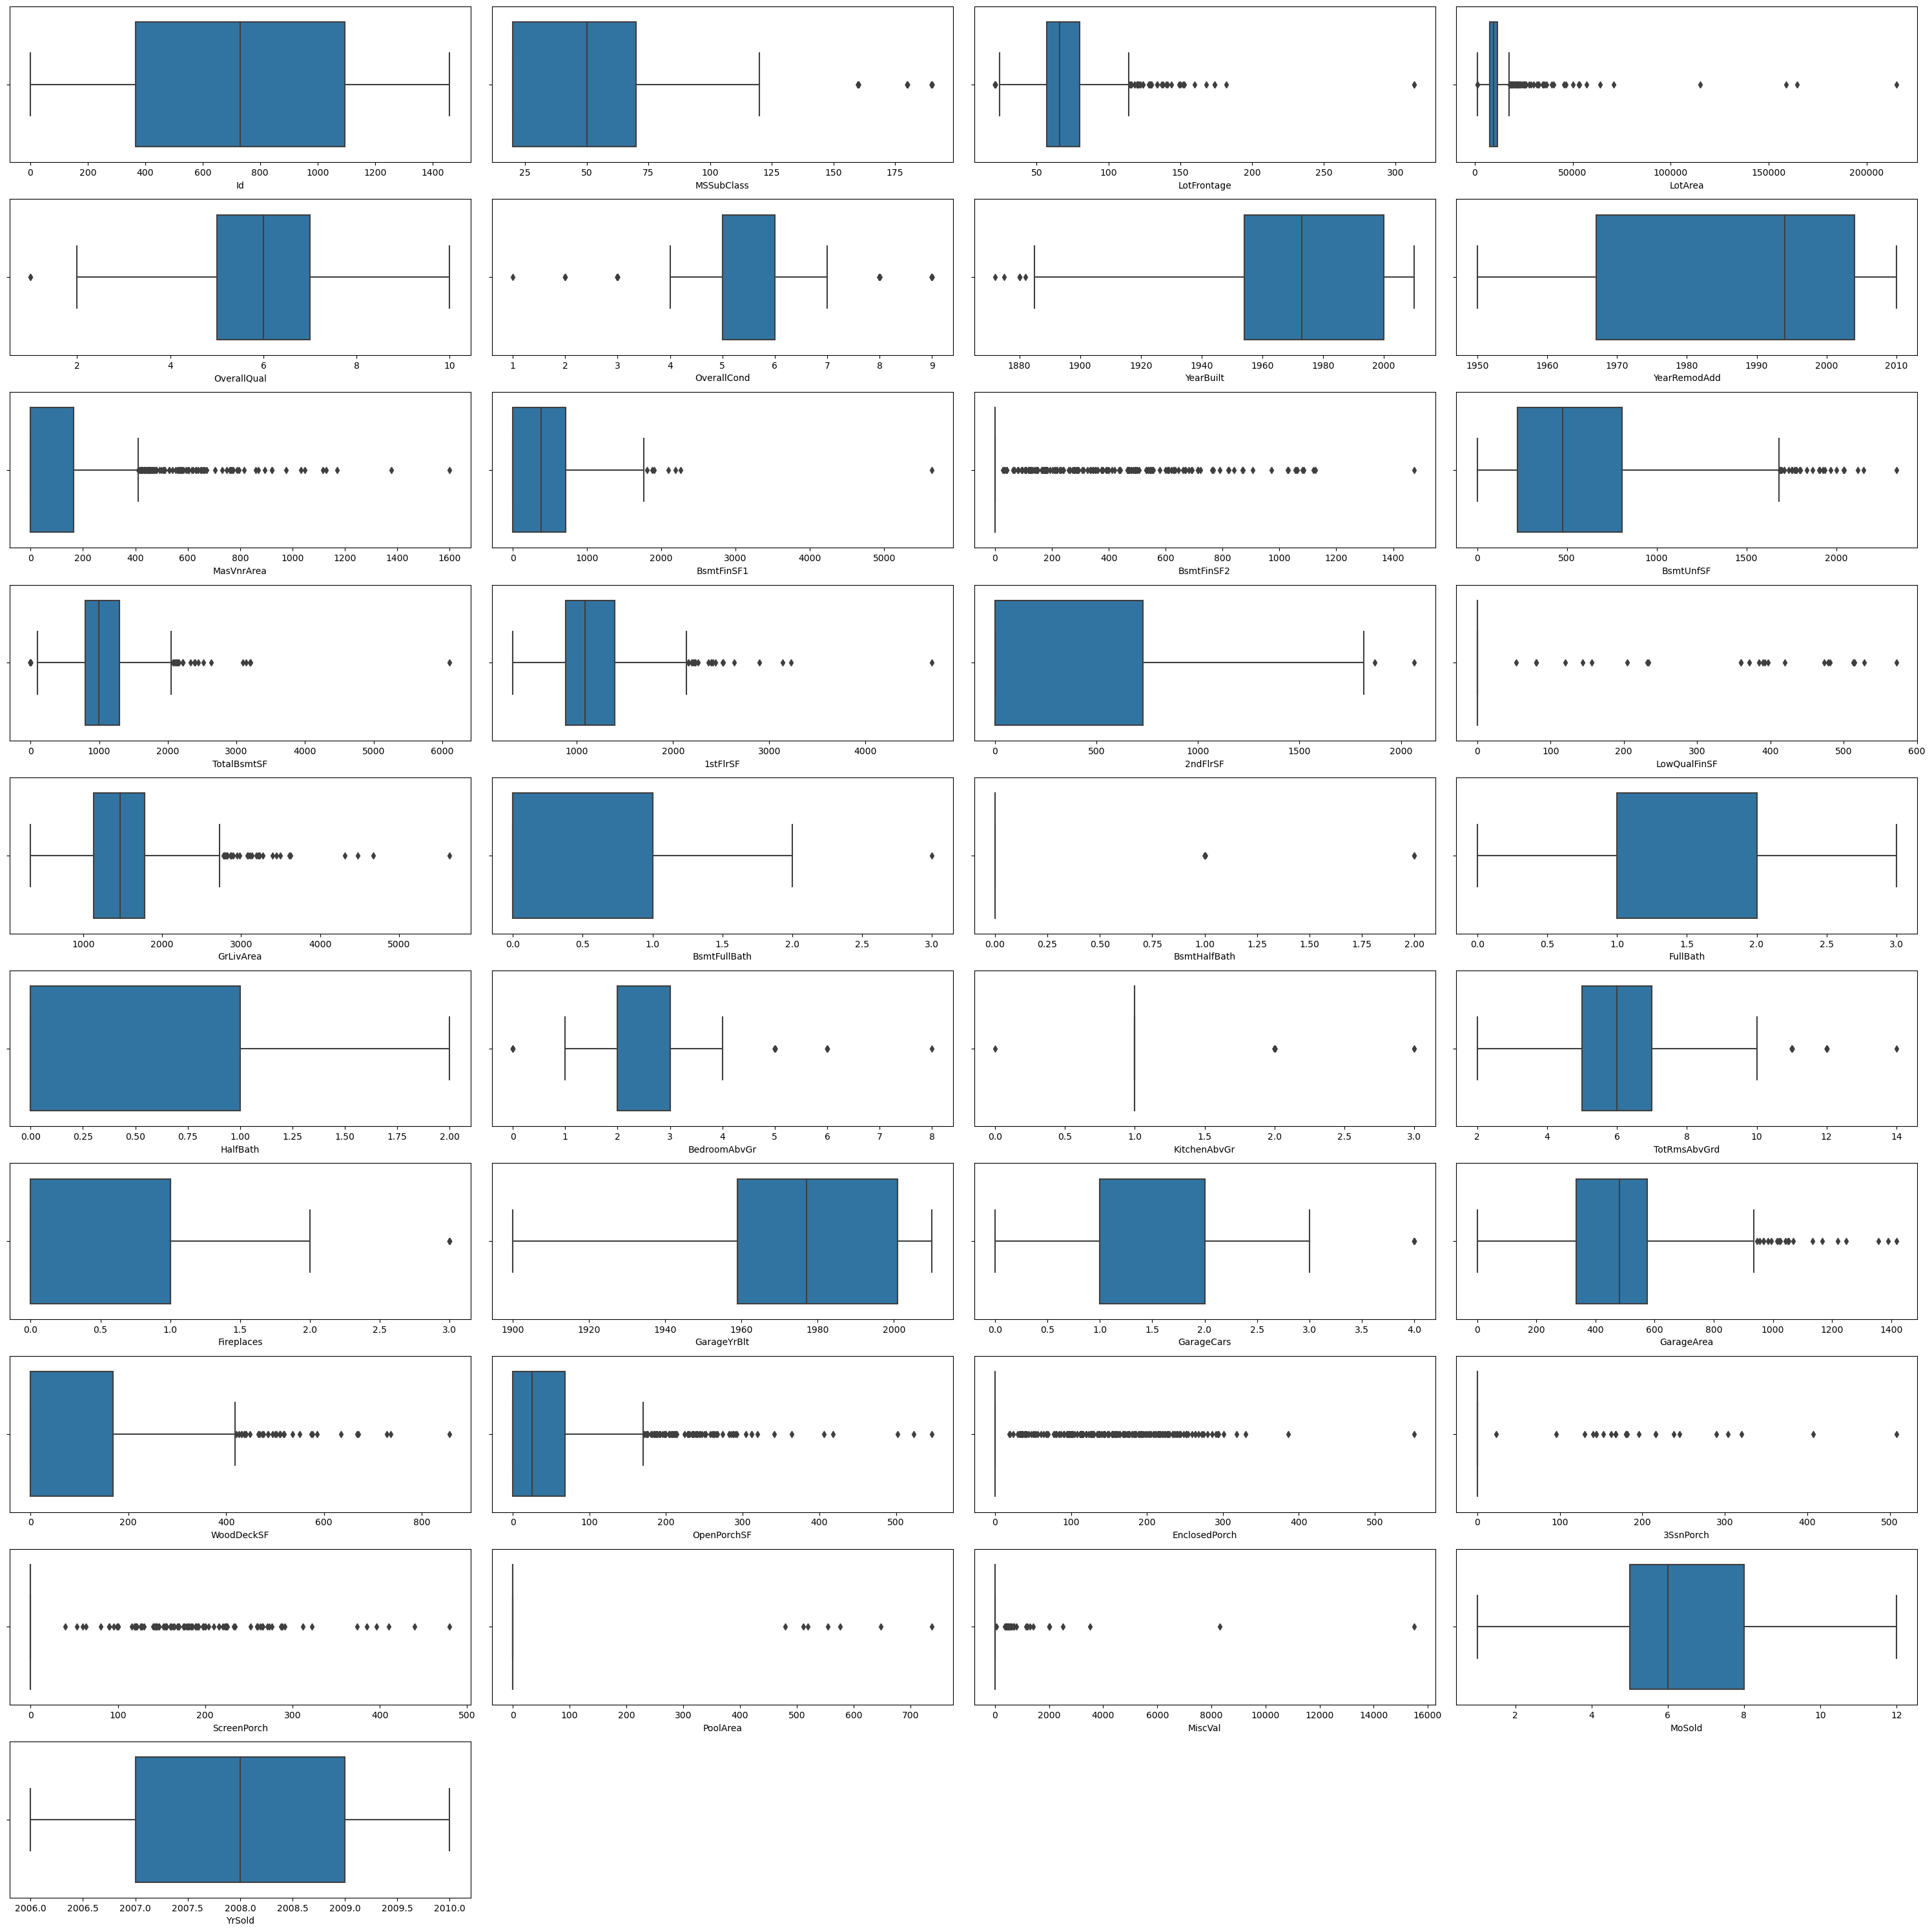

In [281]:
fig = plt.figure(figsize=(30, 30))

for j, i in enumerate(numirical_columns):
    plt.subplot(10, 4, j + 1)

    sns.boxplot(data=df_train, x=i)
fig.tight_layout(pad=1.0)

plt.show()

In [282]:
#Уберем выбросы из признаков "LotFrontage", "LotArea", "BsmtFinSF1", 
#"TotalBsmtSF", "GrLivArea"
outliers_col = ["LotFrontage", "LotArea", "BsmtFinSF1", "TotalBsmtSF", "GrLivArea"]

df_train = df_train.drop(df_train[df_train["LotFrontage"] > 185].index)
df_train = df_train.drop(df_train[df_train["LotArea"] > 100000].index)
df_train = df_train.drop(df_train[df_train["BsmtFinSF1"] > 4000].index)
df_train = df_train.drop(df_train[df_train["TotalBsmtSF"] > 5000].index)
df_train = df_train.drop(df_train[df_train["GrLivArea"] > 4000].index)

## Создание новых признаков

In [283]:
df = [df_train, df_test]

for dataset in df:
    dataset["Totalarea"] = dataset["LotArea"] + dataset["LotFrontage"]
    dataset["TotalBsmtFin"] = dataset["BsmtFinSF1"] + dataset["BsmtFinSF2"]
    dataset["TotalSF"] = dataset["TotalBsmtSF"] + dataset["2ndFlrSF"]
    dataset["TotalBath"] = dataset["FullBath"] + dataset["HalfBath"]
    dataset["TotalPorch"] = (
        dataset["ScreenPorch"] + dataset["EnclosedPorch"] + dataset["OpenPorchSF"]
    )

In [284]:
#Преобразуем их в бинарные признаки
def update(val):
    if val > 0:
        return 1
    return 0


for dataset in df:
    dataset["Totalarea"] = dataset["Totalarea"].apply(update)
    dataset["TotalBsmtFin"] = dataset["TotalBsmtFin"].apply(update)
    dataset["TotalSF"] = dataset["TotalSF"].apply(update)
    dataset["TotalBath"] = dataset["TotalBath"].apply(update)
    dataset["TotalPorch"] = dataset["Totalarea"].apply(update)

## Отбор признаков

In [285]:
removed_columns = set()
numirical_columns = []
categorical_columns = []

for col in df_train.columns:
    if df_train[col].dtype != "O":
        numirical_columns.append(col)
    else:
        categorical_columns.append(col)

numirical_columns.remove("SalePrice")

In [286]:
#Установим порог для числовых значений с низкой дисперсией
presntage = 0.8 * (1 - 0.8)
X = df_train[numirical_columns]
var = VarianceThreshold(threshold=presntage)
var.fit(X)

VarianceThreshold(threshold=0.15999999999999998)

In [287]:
boolean_selection = var.get_support()
columns_names = var.feature_names_in_

for i in range(len(boolean_selection)):
    if boolean_selection[i] == False:
        removed_columns.add(columns_names[i])

removed_columns

{'BsmtHalfBath',
 'KitchenAbvGr',
 'TotalBath',
 'TotalPorch',
 'TotalSF',
 'Totalarea'}

Корреляция

<AxesSubplot:>

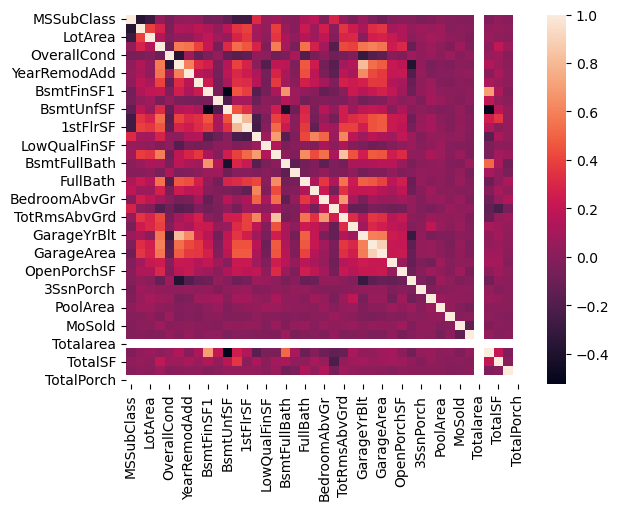

In [288]:
tmp = df_train[numirical_columns].drop(columns=["Id"], axis=1)

corr = tmp.corr()

sns.heatmap(corr)

In [289]:
#Уберем один из признаков в парах с большой корреляцией
def remove_strong_corr(data_set, neg_corr, pos_corr):
    global removed_columns
    correlation = data_set.corr()

    for i in range(len(correlation.columns)):

        for j in range(i):
            corr_value = correlation.iloc[i, j]

            if corr_value < 0 and corr_value < neg_corr:
                print(correlation.columns[j], correlation.columns[i])
                removed_columns.add(correlation.columns[j])
            elif corr_value > 0 and corr_value > pos_corr:
                print(correlation.columns[j], correlation.columns[i])
                removed_columns.add(correlation.columns[j])

    return


remove_strong_corr(tmp, neg_corr=-0.4, pos_corr=0.8)
print(len(removed_columns))
print(removed_columns)


BsmtFinSF1 BsmtUnfSF
TotalBsmtSF 1stFlrSF
BsmtUnfSF BsmtFullBath
GrLivArea TotRmsAbvGrd
YearBuilt GarageYrBlt
GarageCars GarageArea
BsmtUnfSF TotalBsmtFin
12
{'TotalPorch', 'KitchenAbvGr', 'Totalarea', 'TotalBsmtSF', 'TotalSF', 'BsmtFinSF1', 'BsmtUnfSF', 'BsmtHalfBath', 'TotalBath', 'GarageCars', 'YearBuilt', 'GrLivArea'}


In [290]:
removed_columns.remove("GrLivArea")
removed_columns

{'BsmtFinSF1',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'GarageCars',
 'KitchenAbvGr',
 'TotalBath',
 'TotalBsmtSF',
 'TotalPorch',
 'TotalSF',
 'Totalarea',
 'YearBuilt'}

In [291]:
tmp = df_train[categorical_columns]
tmp

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [292]:
tmp.nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          7
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [293]:
ord = OrdinalEncoder()
ord.fit(tmp)
tmp[tmp.columns] = ord.transform(tmp)
tmp

C:\Users\Alexg\AppData\Local\Temp\ipykernel_235176\4194194019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp[tmp.columns] = ord.transform(tmp)


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
1,3.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,1.0,2.0,3.0,1.0,0.0,5.0,1.0,0.0,1.0,4.0,3.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
2,3.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
3,3.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,1.0,0.0,13.0,15.0,2.0,3.0,4.0,0.0,3.0,1.0,3.0,0.0,5.0,1.0,2.0,1.0,4.0,2.0,6.0,5.0,2.0,4.0,4.0,2.0,8.0,0.0
4,3.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,0.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3.0,1.0,3.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,2.0,3.0,4.0,2.0,2.0,3.0,3.0,5.0,5.0,1.0,0.0,1.0,4.0,3.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
1456,3.0,1.0,3.0,3.0,0.0,4.0,0.0,14.0,2.0,2.0,0.0,2.0,1.0,0.0,9.0,10.0,3.0,3.0,4.0,1.0,2.0,3.0,3.0,0.0,4.0,1.0,4.0,1.0,4.0,3.0,2.0,1.0,2.0,4.0,4.0,2.0,8.0,4.0
1457,3.0,1.0,3.0,3.0,0.0,4.0,0.0,6.0,2.0,2.0,0.0,5.0,1.0,0.0,5.0,5.0,2.0,0.0,2.0,4.0,3.0,1.0,3.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
1458,3.0,1.0,3.0,3.0,0.0,4.0,0.0,12.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,3.0,4.0,1.0,3.0,3.0,2.0,2.0,4.0,1.0,2.0,1.0,0.0,2.0,6.0,1.0,2.0,4.0,4.0,2.0,8.0,4.0


In [294]:
X = tmp
Y = df_train["SalePrice"]

chi_state, p_value = chi2(X, Y)

needed_column = 0
column_names = []
columns = list(X.columns)


for i in range(len(p_value)):
    if p_value[i] <= 0.05:
        needed_column += 1
        column_names.append(columns[i])
        removed_columns.add(columns[i])

print("Количество всех признаков = ", len(p_value))
print("Необходимые признаки = ", needed_column)
print("Признаки, которые пойдут в модель : ", column_names)
print("Количество убранных признаков :", len(removed_columns))
print("Убранные признаки :", removed_columns)

Количество всех признаков =  38
Необходимые признаки =  10
Признаки, которые пойдут в модель :  ['LotShape', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofMatl', 'Exterior2nd', 'BsmtFinType1', 'HeatingQC', 'GarageType']
Количество убранных признаков : 21
Убранные признаки : {'TotalSF', 'GarageCars', 'TotalPorch', 'Exterior2nd', 'RoofMatl', 'TotalBath', 'Neighborhood', 'YearBuilt', 'HeatingQC', 'HouseStyle', 'BsmtFinType1', 'BsmtUnfSF', 'BsmtHalfBath', 'LotShape', 'KitchenAbvGr', 'Totalarea', 'TotalBsmtSF', 'BldgType', 'BsmtFinSF1', 'GarageType', 'LandSlope'}


In [295]:
#Применим VarianceThreshold для категориальных переменных
presntage = 0.8 * (1 - 0.8)
X = tmp
var = VarianceThreshold(threshold=presntage)
var.fit(X)

VarianceThreshold(threshold=0.15999999999999998)

In [296]:
boolean_selection = var.get_support()
columns_names = var.feature_names_in_
print(boolean_selection)
print()
print(columns_names)

[ True False  True  True False  True False  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True False  True  True  True  True  True  True  True  True
  True  True]

['MSZoning' 'Street' 'LotShape' 'LandContour' 'Utilities' 'LotConfig'
 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2' 'BldgType'
 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'GarageType'
 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive' 'SaleType'
 'SaleCondition']


In [297]:
for i in range(len(boolean_selection)):
    if boolean_selection[i] == False:
        removed_columns.add(columns_names[i])

print(len(removed_columns))
print((removed_columns))

26
{'Street', 'TotalSF', 'GarageCars', 'TotalPorch', 'Exterior2nd', 'RoofMatl', 'TotalBath', 'Neighborhood', 'YearBuilt', 'Utilities', 'HeatingQC', 'HouseStyle', 'BsmtFinType1', 'Heating', 'CentralAir', 'BsmtUnfSF', 'BsmtHalfBath', 'LotShape', 'Condition2', 'KitchenAbvGr', 'Totalarea', 'TotalBsmtSF', 'BldgType', 'BsmtFinSF1', 'GarageType', 'LandSlope'}


In [298]:
#Уберем признаки, в которых одно значение занимает больше, чем 85%
for col in df_train.columns:
    count = df_train[col].value_counts().sort_values(ascending=False)
    top_value_count = count.iloc[0]
    if top_value_count * 100 / len(df_train) > 85:
        removed_columns.add(col)

print(len(removed_columns))
print()
print((removed_columns))

44

{'Condition1', 'ScreenPorch', 'Street', 'TotalSF', 'PoolArea', 'BsmtCond', 'GarageCars', 'EnclosedPorch', 'MiscVal', 'TotalPorch', 'Exterior2nd', '3SsnPorch', 'GarageCond', 'RoofMatl', 'BsmtFinSF2', 'TotalBath', 'Neighborhood', 'YearBuilt', 'BsmtFinType2', 'Utilities', 'PavedDrive', 'Functional', 'HeatingQC', 'HouseStyle', 'BsmtFinType1', 'Heating', 'SaleType', 'CentralAir', 'BsmtUnfSF', 'LandContour', 'BsmtHalfBath', 'LotShape', 'GarageQual', 'Condition2', 'ExterCond', 'KitchenAbvGr', 'Totalarea', 'TotalBsmtSF', 'BldgType', 'LowQualFinSF', 'BsmtFinSF1', 'Electrical', 'GarageType', 'LandSlope'}


In [299]:
removed_columns.remove("TotalBath")
removed_columns.remove("TotalSF")
removed_columns.remove("TotalBsmtSF")
removed_columns.remove("TotalPorch")
removed_columns.remove("Totalarea")

df = [df_train, df_test]


for dataset in df:
    dataset.drop(columns=list(removed_columns), axis=1, inplace=True)
df_train.shape, df_test.shape
# df_test.info()

((1451, 42), (1459, 41))

In [300]:
#Исправим ассиметричность целевой переменной с помощью логорифмирования
df_train["SalePrice"].skew()

1.5803037060213119

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

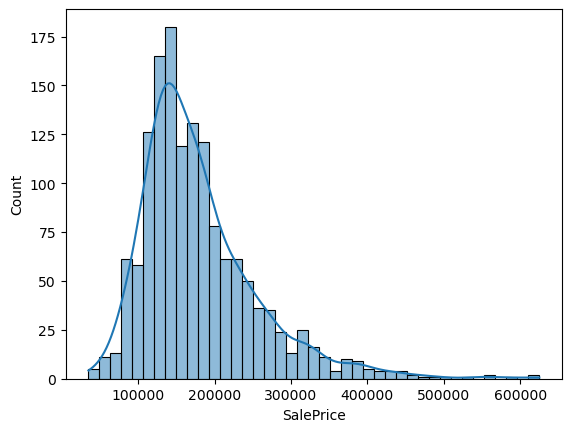

In [301]:
sns.histplot(df_train["SalePrice"], kde=True)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

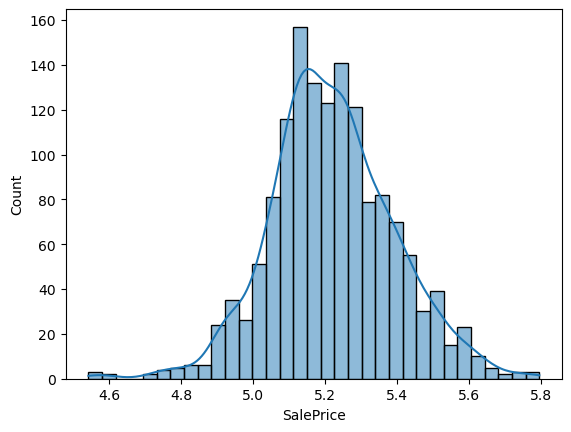

In [302]:
sns.histplot(np.log10(df_train["SalePrice"]), kde=True)

In [303]:
df_train["SalePrice"] = np.log10(df_train["SalePrice"])
print(
    df_train["SalePrice"].skew(),
    " ",
    df_train["SalePrice"].mean(),
    " ",
    df_train["SalePrice"].std(),
)

0.06888165765813435   5.220281457482229   0.17173577130960033


## Применим OneHot кодирование

In [304]:
df_train = pd.get_dummies(df_train, drop_first=True)
df_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,Totalarea,TotalBsmtFin,TotalSF,TotalBath,TotalPorch,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,196.0,856,856,854,1710,1,2,1,3,8,0,2003.0,548,0,61,2,2008,5.319106,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,0.0,1262,1262,0,1262,0,2,0,3,6,1,1976.0,460,298,0,5,2007,5.258877,1,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2002,162.0,920,920,866,1786,1,2,1,3,6,1,2001.0,608,0,42,9,2008,5.349278,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1970,0.0,756,961,756,1717,1,1,0,3,7,1,1998.0,642,0,35,2,2006,5.146128,1,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,350.0,1145,1145,1053,2198,1,2,1,4,9,1,2000.0,836,192,84,12,2008,5.397940,1,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [305]:
df_test = pd.get_dummies(df_test, drop_first=True)
df_test.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,Totalarea,TotalBsmtFin,TotalSF,TotalBath,TotalPorch,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,0.0,882.0,896,0,896,0.0,1,0,2,5,0,1961.0,730.0,140,0,6,2010,1,1,1,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,108.0,1329.0,1329,0,1329,0.0,1,1,3,6,0,1958.0,312.0,393,36,6,2010,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0


In [306]:
df_train.shape, df_test.shape

((1451, 84), (1459, 81))

In [307]:
mp = {}

for i in df_train.columns:
    if i in mp:
        mp[i] += 1
    else:
        mp[i] = 1
for i in df_test.columns:
    if i in mp:
        mp[i] += 1
    else:
        mp[i] = 1

for i, j in mp.items():
    if j != 2:
        print(i)

SalePrice
Exterior1st_ImStucc
Exterior1st_Stone


In [308]:
df_test["Exterior1st_ImStucc"] = False
df_test["Exterior1st_Stone"] = False
df_train.shape, df_test.shape

((1451, 84), (1459, 83))

In [309]:
final_test = pd.DataFrame()
for col in df_train.columns:
    if col != "SalePrice":
        final_test[col] = df_test[col]
df_test = final_test

In [310]:
for col in df_train.columns:
    if df_train[col].dtype == "bool":
        df_train[col] = df_train[col].astype("int32")

for col in df_test.columns:
    if df_test[col].dtype == "bool":
        df_test[col] = df_test[col].astype("int32")

In [311]:
df_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,Totalarea,TotalBsmtFin,TotalSF,TotalBath,TotalPorch,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,196.0,856,856,854,1710,1,2,1,3,8,0,2003.0,548,0,61,2,2008,5.319106,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,0.0,1262,1262,0,1262,0,2,0,3,6,1,1976.0,460,298,0,5,2007,5.258877,1,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2002,162.0,920,920,866,1786,1,2,1,3,6,1,2001.0,608,0,42,9,2008,5.349278,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1970,0.0,756,961,756,1717,1,1,0,3,7,1,1998.0,642,0,35,2,2006,5.146128,1,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,350.0,1145,1145,1053,2198,1,2,1,4,9,1,2000.0,836,192,84,12,2008,5.397940,1,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,2000,0.0,953,953,694,1647,0,2,1,3,7,1,1999.0,460,0,40,8,2007,5.243038,1,0,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1988,119.0,1542,2073,0,2073,1,2,0,3,7,2,1978.0,500,349,0,2,2010,5.322219,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,2006,0.0,1152,1188,1152,2340,0,2,0,4,9,2,1941.0,252,0,60,5,2010,5.425697,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1996,0.0,1078,1078,0,1078,1,1,0,2,5,0,1950.0,240,366,0,4,2010,5.152670,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0


In [312]:
df_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,Totalarea,TotalBsmtFin,TotalSF,TotalBath,TotalPorch,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,0.0,882.0,896,0,896,0.0,1,0,2,5,0,1961.000000,730.0,140,0,6,2010,1,1,1,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,108.0,1329.0,1329,0,1329,0.0,1,1,3,6,0,1958.000000,312.0,393,36,6,2010,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1998,0.0,928.0,928,701,1629,0.0,2,1,3,6,1,1997.000000,482.0,212,34,3,2010,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,20.0,926.0,926,678,1604,0.0,2,1,3,7,1,1998.000000,470.0,360,36,6,2010,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,0.0,1280.0,1280,0,1280,0.0,2,0,2,5,0,1992.000000,506.0,0,82,1,2010,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,0.0,546.0,546,546,1092,0.0,1,1,3,5,0,1977.721217,0.0,0,0,6,2006,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,0.0,546.0,546,546,1092,0.0,1,1,3,6,0,1970.000000,286.0,0,24,4,2006,1,1,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1996,0.0,1224.0,1224,0,1224,1.0,1,0,4,7,1,1960.000000,576.0,474,0,9,2006,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,0.0,912.0,970,0,970,0.0,1,0,3,6,0,1977.721217,0.0,80,32,7,2006,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0


## Построение моделей

In [313]:
ids = df_test["Id"]
data = {
    "model": [],
    "MAE": [],
    "MSE": [],
    "RMSE": [],
    "train_score": [],
    "test_score": [],
}
models = pd.DataFrame(columns=data)

df_train = df_train.drop(columns=["Id"], axis=1)
df_test = df_test.drop(columns=["Id"], axis=1)

In [314]:
x_train, x_test, y_train, y_test = train_test_split(
    df_train.drop(columns=["SalePrice"]),
    df_train["SalePrice"],
    test_size=0.3,
    random_state=42,
)

In [315]:
#Линейная регрессия
lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)
train_prediction = lin_reg.predict(x_train)
test_prediction = lin_reg.predict(x_test)

score_train = r2_score(y_true=y_train, y_pred=train_prediction)

score_test = r2_score(y_true=y_test, y_pred=test_prediction)
print("train score = ", score_train)
print("test score = ", score_test)

train score =  0.9256881813639596
test score =  0.8949954674542682


In [316]:
MAE = mean_absolute_error(y_true=y_test, y_pred=test_prediction)
MSE = mean_squared_error(y_true=y_test, y_pred=test_prediction)
RMSE = np.sqrt(mean_absolute_error(y_true=y_test, y_pred=test_prediction))
print("MAE = ", MAE)
print("MSE = ", MSE)
print("RMSE = ", RMSE)
print("acc_score = ", score_test)

MAE =  0.039455757801476136
MSE =  0.0031149546666547046
RMSE =  0.1986347346298631
acc_score =  0.8949954674542682


In [317]:
data = {
    "model": "lin reg",
    "MAE": MAE,
    "MSE": MSE,
    "RMSE": RMSE,
    "train_score": score_train,
    "test_score": score_test,
}
models.loc[len(models)] = data
models

,model,MAE,MSE,RMSE,train_score,test_score
0,lin reg,0.039456,0.003115,0.198635,0.925688,0.894995


In [318]:
#Scaled линейная регрессия
pip = Pipeline(
    [
        ("Scaling", StandardScaler()),
        ("LinearRegression", LinearRegression(positive=True)),
    ]
)
pip.fit(x_train, y_train)

Pipeline(steps=[('Scaling', StandardScaler()),
                ('LinearRegression', LinearRegression(positive=True))])

In [319]:
train_prediction = pip.predict(x_train)
test_prediction = pip.predict(x_test)

score_train = r2_score(y_true=y_train, y_pred=train_prediction)

score_test = r2_score(y_true=y_test, y_pred=test_prediction)
print("train score = ", score_train)
print("test score = ", score_test)

train score =  0.9203926868264021
test score =  0.8905881366754087


In [320]:
MAE = mean_absolute_error(y_true=y_test, y_pred=test_prediction)
MSE = mean_squared_error(y_true=y_test, y_pred=test_prediction)
RMSE = np.sqrt(mean_absolute_error(y_true=y_test, y_pred=test_prediction))
print("MAE = ", MAE)
print("MSE = ", MSE)
print("RMSE = ", RMSE)
print("acc_score = ", score_test)

MAE =  0.04013733701461551
MSE =  0.0032456979331048474
RMSE =  0.20034304833114502
acc_score =  0.8905881366754087


In [321]:
data = {
    "model": "lin reg scaled",
    "MAE": MAE,
    "MSE": MSE,
    "RMSE": RMSE,
    "train_score": score_train,
    "test_score": score_test,
}
models.loc[len(models)] = data
models

,model,MAE,MSE,RMSE,train_score,test_score
0,lin reg,0.039456,0.003115,0.198635,0.925688,0.894995
1,lin reg scaled,0.040137,0.003246,0.200343,0.920393,0.890588


In [322]:
#ridge

#param_grid = {"alpha": [0.1, 0.2, 0.8, 1, 1.5, 2, 4, 5, 6.5, 8, 10, 15, 20]}

#ridge = Ridge()


#optimized_ridge = GridSearchCV(
#    estimator=ridge,
#    param_grid=param_grid,
#    cv=10,
#    verbose=3,
#)
#optimized_ridge.fit(x_train, y_train)

#print("best_params_", optimized_ridge.best_params_)
#print("best score", optimized_ridge.best_score_)
ridge = Ridge(alpha=5)
ridge.fit(x_train, y_train)

Ridge(alpha=5)

In [323]:
train_prediction = ridge.predict(x_train)
test_prediction = ridge.predict(x_test)

score_train = r2_score(y_true=y_train, y_pred=train_prediction)

score_test = r2_score(y_true=y_test, y_pred=test_prediction)
print("train score = ", score_train)
print("test score = ", score_test)

train score =  0.9221733472036325
test score =  0.8909906388834561


In [324]:
MAE = mean_absolute_error(y_true=y_test, y_pred=test_prediction)
MSE = mean_squared_error(y_true=y_test, y_pred=test_prediction)
RMSE = np.sqrt(mean_absolute_error(y_true=y_test, y_pred=test_prediction))
print("MAE = ", MAE)
print("MSE = ", MSE)
print("RMSE = ", RMSE)
print("acc_score = ", score_test)

MAE =  0.03983186404262706
MSE =  0.003233757723469133
RMSE =  0.19957921746170632
acc_score =  0.8909906388834561


In [325]:
data = {
    "model": "Ridge",
    "MAE": MAE,
    "MSE": MSE,
    "RMSE": RMSE,
    "train_score": score_train,
    "test_score": score_test,
}
models.loc[len(models)] = data
models

,model,MAE,MSE,RMSE,train_score,test_score
0,lin reg,0.039456,0.003115,0.198635,0.925688,0.894995
1,lin reg scaled,0.040137,0.003246,0.200343,0.920393,0.890588
2,Ridge,0.039832,0.003234,0.199579,0.922173,0.890991


In [326]:
#ElasticNet

#param_grid = {
#    "alpha": [0.1, 0.02, 0.08, 0.05, 0.2, 0.4, 0.0001, 0.0002, 0.0005],
#    "l1_ratio": [0.1, 0.001, 0.006, 0.02, 0.03, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
#}

#Elastic = ElasticNet(max_iter=5000)


#optimized_ridge = GridSearchCV(
#    estimator=Elastic,
#    param_grid=param_grid,
#    cv=5,
#    verbose=3,
#)
#optimized_ridge.fit(x_train, y_train)

#print("best_params_", optimized_ridge.best_params_)
#print("best score", optimized_ridge.best_score_)

Elastic = ElasticNet(max_iter=5000, alpha=0.0005, l1_ratio=0.5)

Elastic.fit(x_train, y_train)

ElasticNet(alpha=0.0005, max_iter=5000)

In [327]:
train_prediction = Elastic.predict(x_train)
test_prediction = Elastic.predict(x_test)

score_train = r2_score(y_true=y_train, y_pred=train_prediction)

score_test = r2_score(y_true=y_test, y_pred=test_prediction)
print("train score = ", score_train)
print("test score = ", score_test)

train score =  0.9192885697319443
test score =  0.8894544702607193


In [328]:
MAE = mean_absolute_error(y_true=y_test, y_pred=test_prediction)
MSE = mean_squared_error(y_true=y_test, y_pred=test_prediction)
RMSE = np.sqrt(mean_absolute_error(y_true=y_test, y_pred=test_prediction))
print("MAE = ", MAE)
print("MSE = ", MSE)
print("RMSE = ", RMSE)
print("acc_score = ", score_test)

MAE =  0.04004518127148546
MSE =  0.003279328095567867
RMSE =  0.2001129213006633
acc_score =  0.8894544702607193


In [329]:
data = {
    "model": "Elastic",
    "MAE": MAE,
    "MSE": MSE,
    "RMSE": RMSE,
    "train_score": score_train,
    "test_score": score_test,
}
models.loc[len(models)] = data
models

,model,MAE,MSE,RMSE,train_score,test_score
0,lin reg,0.039456,0.003115,0.198635,0.925688,0.894995
1,lin reg scaled,0.040137,0.003246,0.200343,0.920393,0.890588
2,Ridge,0.039832,0.003234,0.199579,0.922173,0.890991
3,Elastic,0.040045,0.003279,0.200113,0.919289,0.889454


In [330]:
#Случайный лес
#param_grid = {
#    "max_depth": [25, 30, 31, 35],
#    "min_samples_split": [2, 4, 5, 6],
#    "min_samples_leaf": [1, 2, 3],
#    "max_features": ["sqrt"],
#    "ccp_alpha": [0.00001, 0.00002, 0.000001, 0.000003],
#}

#RF = RandomForestRegressor(n_estimators=50, random_state=45)


#optimized_ridge = GridSearchCV(
#    estimator=RF,
#    param_grid=param_grid,
#    cv=5,
#    verbose=3,
#)
#optimized_ridge.fit(x_train, y_train)

#print("best_params_", optimized_ridge.best_params_)
#print("best score", optimized_ridge.best_score_)

RF = RandomForestRegressor(n_estimators=50, random_state=45)
RF.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=45)

In [331]:
RF.score(x_train, y_train), RF.score(x_test, y_test)

(0.9809411050689916, 0.8622652148948494)

In [332]:
RF = RandomForestRegressor(
    n_estimators=50,
    random_state=45,
    ccp_alpha=1e-05,
    max_depth=30,
    max_features="sqrt",
    min_samples_leaf=1,
    min_samples_split=5,
)
RF.fit(x_train, y_train)

RandomForestRegressor(ccp_alpha=1e-05, max_depth=30, max_features='sqrt',
                      min_samples_split=5, n_estimators=50, random_state=45)

In [333]:
RF.score(x_train, y_train), RF.score(x_test, y_test)

(0.9609061435872148, 0.8556460130918454)

In [334]:
MAE = mean_absolute_error(y_true=y_test, y_pred=test_prediction)
MSE = mean_squared_error(y_true=y_test, y_pred=test_prediction)
RMSE = np.sqrt(mean_absolute_error(y_true=y_test, y_pred=test_prediction))
print("MAE = ", MAE)
print("MSE = ", MSE)
print("RMSE = ", RMSE)
print("acc_score = ", score_test)

MAE =  0.04004518127148546
MSE =  0.003279328095567867
RMSE =  0.2001129213006633
acc_score =  0.8894544702607193


In [335]:
data = {
    "model": "Random Foreest",
    "MAE": MAE,
    "MSE": MSE,
    "RMSE": RMSE,
    "train_score": score_train,
    "test_score": score_test,
}
models.loc[len(models)] = data
models

,model,MAE,MSE,RMSE,train_score,test_score
0,lin reg,0.039456,0.003115,0.198635,0.925688,0.894995
1,lin reg scaled,0.040137,0.003246,0.200343,0.920393,0.890588
2,Ridge,0.039832,0.003234,0.199579,0.922173,0.890991
3,Elastic,0.040045,0.003279,0.200113,0.919289,0.889454
4,Random Foreest,0.040045,0.003279,0.200113,0.919289,0.889454


In [336]:
#Voting system
vot = VotingRegressor(
    estimators=[
        ("LinearRegression", LinearRegression()),
        (
            "LinearRegression scaled ",
            Pipeline(
                [
                    ("Scaling", StandardScaler()),
                    ("LinearRegression", LinearRegression(positive=True)),
                ]
            ),
        ),
        ("Ridge", Ridge(alpha=5)),
        ("ElasticNet", ElasticNet(max_iter=5000, alpha=0.0005, l1_ratio=0.5)),
        (
            "RandomForestRegressor",
            RandomForestRegressor(
                n_estimators=50,
                random_state=45,
                ccp_alpha=1e-05,
                max_depth=30,
                max_features="sqrt",
                min_samples_leaf=1,
                min_samples_split=5,
            ),
        ),
    ]
)
vot.fit(x_train, y_train)

VotingRegressor(estimators=[('LinearRegression', LinearRegression()),
                            ('LinearRegression scaled ',
                             Pipeline(steps=[('Scaling', StandardScaler()),
                                             ('LinearRegression',
                                              LinearRegression(positive=True))])),
                            ('Ridge', Ridge(alpha=5)),
                            ('ElasticNet',
                             ElasticNet(alpha=0.0005, max_iter=5000)),
                            ('RandomForestRegressor',
                             RandomForestRegressor(ccp_alpha=1e-05,
                                                   max_depth=30,
                                                   max_features='sqrt',
                                                   min_samples_split=5,
                                                   n_estimators=50,
                                                   random_state=45))])

In [337]:
train_prediction = vot.predict(x_train)
test_prediction = vot.predict(x_test)

score_train = r2_score(y_true=y_train, y_pred=train_prediction)

score_test = r2_score(y_true=y_test, y_pred=test_prediction)
print("train score = ", score_train)
print("test score = ", score_test)

train score =  0.9376488078557144
test score =  0.8952889555386023


In [338]:
MAE = mean_absolute_error(y_true=y_test, y_pred=test_prediction)
MSE = mean_squared_error(y_true=y_test, y_pred=test_prediction)
RMSE = np.sqrt(mean_absolute_error(y_true=y_test, y_pred=test_prediction))
print("MAE = ", MAE)
print("MSE = ", MSE)
print("RMSE = ", RMSE)
print("acc_score = ", score_test)

MAE =  0.03857380615412855
MSE =  0.0031062483560246757
RMSE =  0.19640215414839154
acc_score =  0.8952889555386023


In [339]:
data = {
    "model": "Votting",
    "MAE": MAE,
    "MSE": MSE,
    "RMSE": RMSE,
    "train_score": score_train,
    "test_score": score_test,
}
models.loc[len(models)] = data
models

,model,MAE,MSE,RMSE,train_score,test_score
0,lin reg,0.039456,0.003115,0.198635,0.925688,0.894995
1,lin reg scaled,0.040137,0.003246,0.200343,0.920393,0.890588
2,Ridge,0.039832,0.003234,0.199579,0.922173,0.890991
3,Elastic,0.040045,0.003279,0.200113,0.919289,0.889454
4,Random Foreest,0.040045,0.003279,0.200113,0.919289,0.889454
5,Votting,0.038574,0.003106,0.196402,0.937649,0.895289


## Итоги

In [343]:
#Лучший результат на тестовой выборки получилось у Voting модели
def output_inverse(value):
    value_inverse = math.pow(10, value)
    return value_inverse

# df_test.info()
na = ["TotalBsmtSF", "BsmtFullBath", "GarageArea"]
for feature in na:
    df_test[feature].fillna(df_test[feature].mean(), inplace=True)
# df_test.info()
predictions = vot.predict(df_test)

for i in range(len(predictions)):
    predictions[i] = output_inverse(predictions[i])
predictions 

array([121492.66399029, 153130.69044443, 175717.78518893, ...,
       168717.47757101, 121963.52470195, 225020.15410973])